In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [4]:
print(f'{X.shape}, {y.shape}')

(200, 3), (200,)


In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)


In [7]:
polynomial_features = polynomial_converter.fit_transform(X)
polynomial_features.shape

(200, 9)

In [9]:
X.head(1)

,TV,radio,newspaper
0,230.1,37.8,69.2


In [14]:
print(f'{polynomial_features[0]}')

[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=101)

In [17]:
print(f'{X_train.shape}, {y_train.shape}')

(140, 9), (140,)


In [18]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [23]:
Mae = mean_squared_error(y_test, predictions)
Rmse = root_mean_squared_error(y_test, predictions)
print(f'{Mae}, {Rmse}')

0.44175055104037525, 0.6646431757269273


In [24]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [25]:
train_mae_errors = []
test_mae_errors = []
for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree = d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
    model = LinearRegression(fit_intercept=True)

    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    mae_train = mean_squared_error(y_test, y_hat_test)
    mae_test = mean_squared_error(y_train, y_hat_train)

    train_mae_errors.append(mae_train)
    test_mae_errors.append(mae_test)
    

In [30]:
print(train_mae_errors)
print(test_mae_errors)

[2.2987166978863773, 0.44175055104037525, 0.33678137975824923, 0.2578347030058417, 6.634818471309368, 18.794517450066905, 1902114.4022032574, 17049098.218106855, 9236678436.188242]
[3.0088167761579956, 0.3456939142443997, 0.18829909447777834, 0.12369877671204729, 0.06296802102607396, 0.04345883207043031, 29.393502790141664, 0.01985224734266109, 0.02943053213827813]


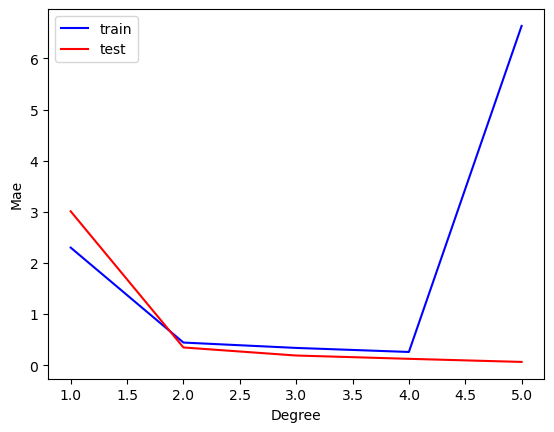

In [33]:
plt.plot(range(1, 6), train_mae_errors[0:5], color = 'blue', label = 'train')
plt.plot(range(1, 6), test_mae_errors[0:5], color = 'red', label = 'test')
plt.xlabel('Degree')
plt.ylabel('Mae')
plt.legend()
plt.show()

In [34]:
poly_converter = PolynomialFeatures(degree = 3, include_bias= False)
poly_features = poly_converter.fit_transform(X)
final_model = LinearRegression()
final_model.fit(poly_features, y)
final_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [35]:
from joblib import load, dump
dump(final_model, 'poly_model.joblib')
dump(poly_converter, 'poly_converter.joblib')


['poly_converter.joblib']

In [38]:
poly_converter = load('poly_converter.joblib')
final_model = load('poly_model.joblib')
campaign = [[25, 40, 35]]
X = poly_converter.transform(campaign)
print(X.shape)
prediction = final_model.predict(X)
print(prediction)

(1, 19)
[8.56712806]
